## **Predição de Doença Cardíaca**
---
O objetivo desse projeto é prever se o paciente possui doença cardíaca a partir dos indicadores disponibilizados pelo banco de dados.C

---
O banco de dados possui os seguintes indicadores:


*   Age (Idade)
*   Sex (Sexo) - 1 sendo masculino e 0 feminino
*   CP: Tipo de dor no peito - 4 tipos (Chest Pain Type)
*   TRESTBPS: Pressão Arterial em Repouso (Resting Blood Pressure)
*   CHOL: Colesterol Sérico em mg/dl (Serum Cholestoral)
*   FBS: Açucar no Sangue em Jejum - 120 mg/dl (Fasting Blood Sugar)
*   RESTECG: Resultados de Eletrocardiografia em Repouso - Valores 0,1 e 2(Resting Eletrocardiography Rest)
*   THALACH: Frequência Cardíaca Máxima Alcançada (Maximum Heart Rate Frequency)
*   EXANG: Angina Induzida por Exercício (Exercise Induced Angina)
*  OLDPEAK: Pico Antigo = depressão do segmento ST induzida pelo exercício em relação ao repouso (Oldpeak = ST depression induced by exercise relative to rest)
* SLOPE: A inclinação do pico do segmento ST do exercício (The slope of the peak exercise ST segment)
*  CS: Número de vasos principais (0-3) coloridos por fluorosopia (Number of major vessels (0-3) colored by flourosopy)
*   THAL : 0 = normal; 1 = defeito fixo; 2 = defeito reversível (Thal: 0 = normal; 1 = fixed defect; 2 = reversable defect)
*   TARGET: Doença do coração (1 = sim, 0 = não)



---

Os dados foram extraídos do [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/)

Feito por: Whendel Muniz dos Santos

E-mail: whendel.muniz@ufpe.br

##Importação de Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from io import open
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

##Carregamento e Verificação da Base de Dados

In [ ]:
core = pd.read_csv("/content/heart.csv") #Carregamento do banco de dados
core

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
core.describe() #Descrição da base de dados sem alterações. É possível percebrr, por exemplo, que a idade mínima da base de dados é 29 dados e a idade máxima é 77.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
core.info() #Verificar se há dados nulos no banco da dados. Neste caso, não há.

core.duplicated().sum() #Verificar quantas linhas duplicadas existem no banco dados (723 nesse caso).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


723


---
Para casos de Machine Learning, é necessário eliminar linhas repetidas, pois essas linhas podem modificar significativamente a eficácia do treino.

---



##Filtragem Inicial e Observações

In [ ]:
core_novo = core.drop_duplicates() #Elimina todos os dados repetidos.
core_novo.duplicated() #Verificação da eliminação dos dados repetidos.

0      False
1      False
2      False
3      False
4      False
       ...  
723    False
733    False
739    False
843    False
878    False
Length: 302, dtype: bool

In [ ]:
core_novo.describe() #É possível verificar que as características estatísticas, ao retirar as linhas repetidas, não mudaram significativamente.
#Também é possível verificar que o valor do colesterol apresenta pontos destoantes da maioria (75%), como o de 564 mg/d.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##Separação de Variáveis Categóricas e Não-Categóricas

In [ ]:
var_categ = ["sex", "cp", "fbs", "restecg","exang", "slope", "ca","thal" ]
var_noncateg = ["age", "trestbps","chol","thalach","oldpeak"]
#Separação de variáveis a partir das características detalhadas do banco de dados.

##Visualização inicial das variáveis

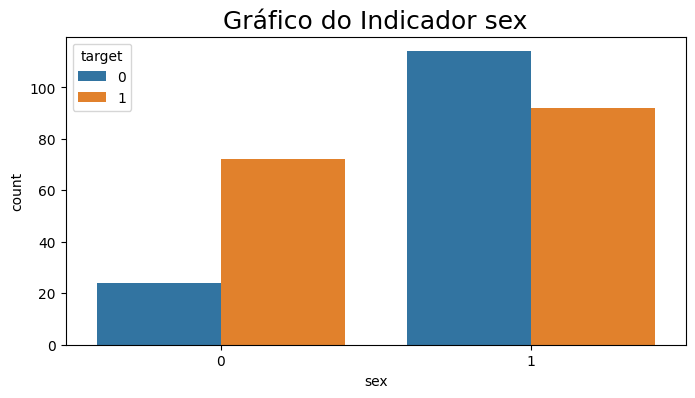

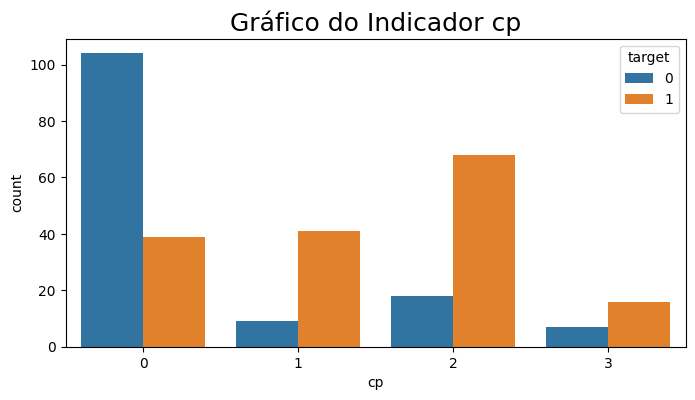

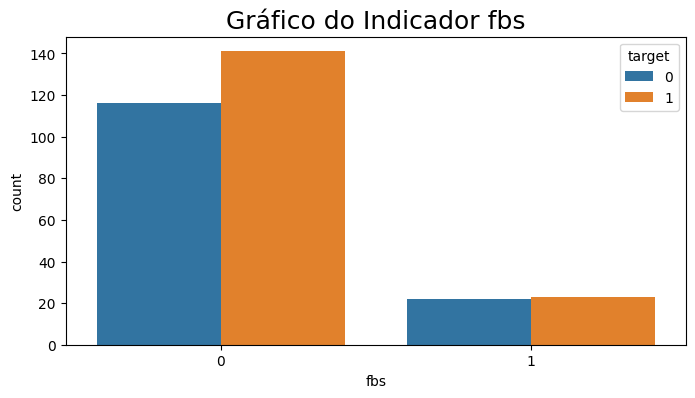

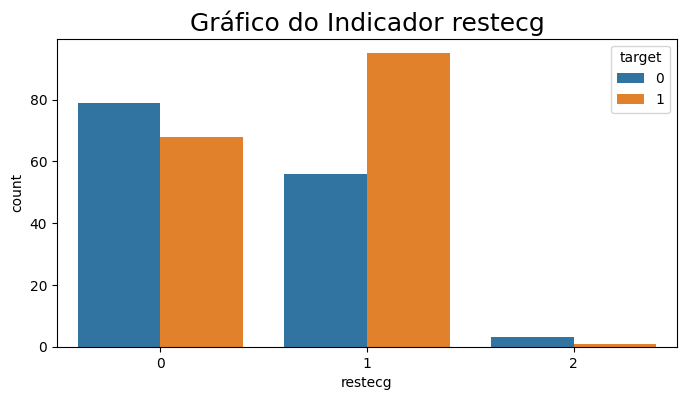

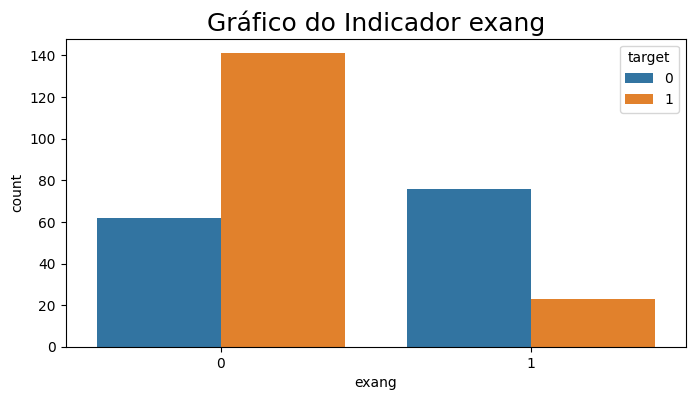

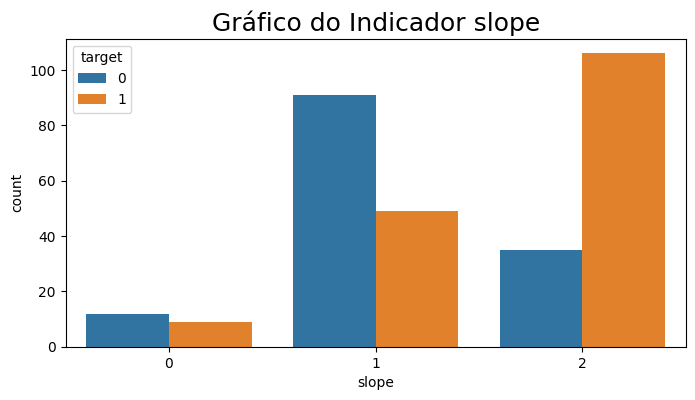

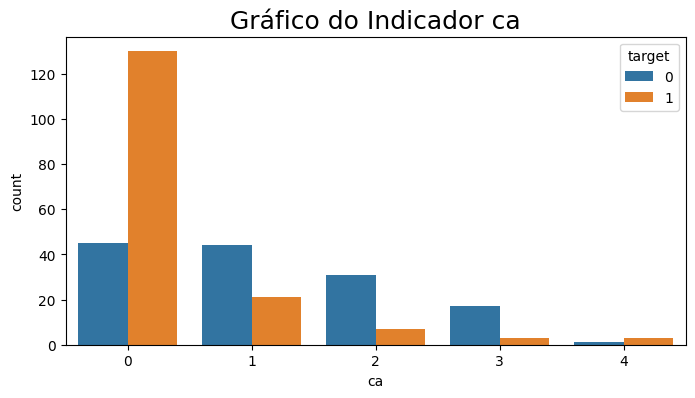

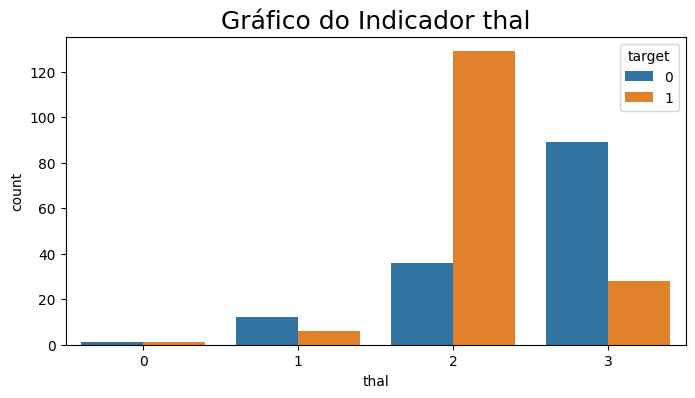

In [ ]:
for y in var_categ:
  plt.figure(figsize = (8,4))
  plt.title(f"Gráfico do Indicador {y}", fontsize = 18) #o 'f' serve para indicar uma variável dentro de uma informação.
  sb.countplot(x = core_novo[y], hue = core_novo['target'] )
#plotagem das variáveis categóricas com relação ao target

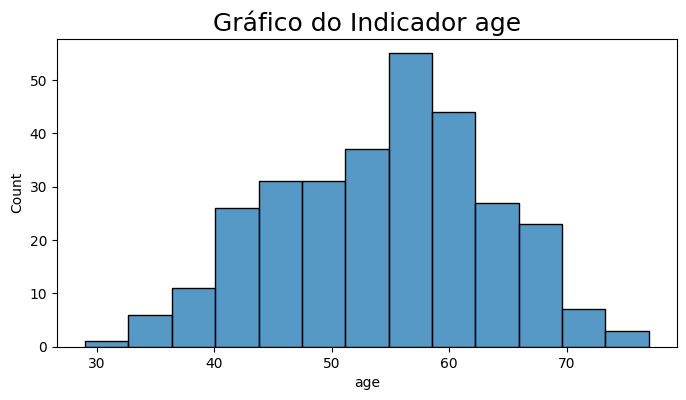

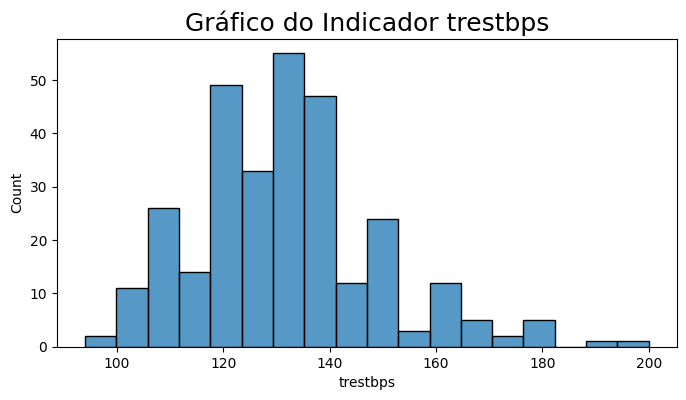

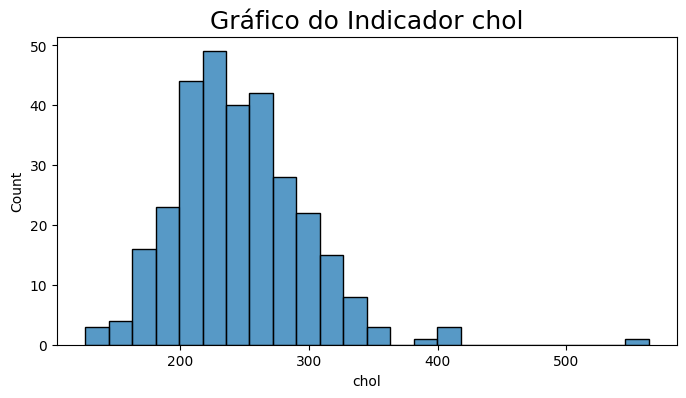

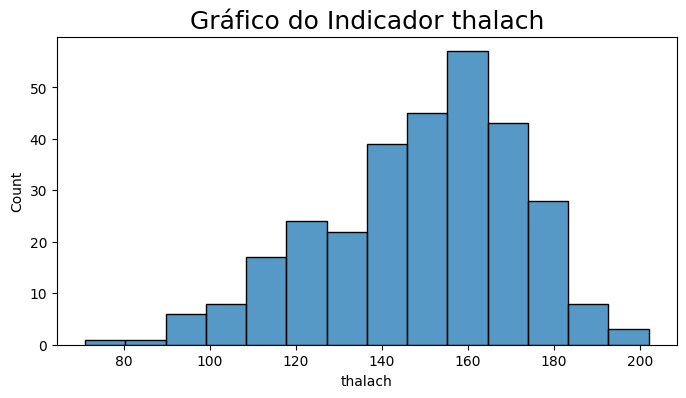

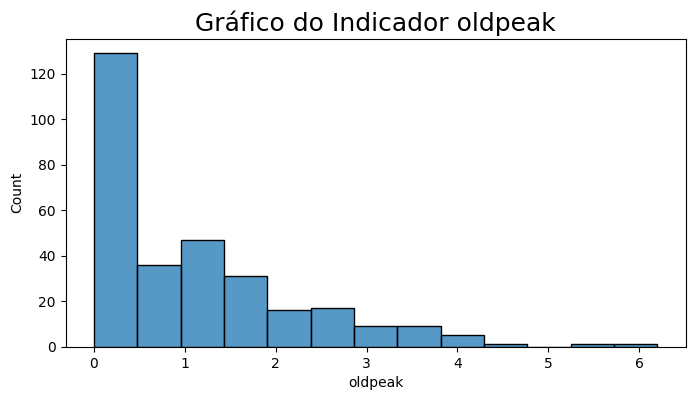

In [ ]:
for y in var_noncateg:
  plt.figure(figsize = (8,4))
  plt.title(f"Gráfico do Indicador {y}", fontsize = 18) #o 'f' serve para indicar uma variável dentro de uma informação.
  sb.histplot(core_novo[y])
#plotagem das variáveis não categóricas com relação ao número de dados


---
É possível visualizar, por exemplo, que a variável referente ao colesterol apresenta valores destoantes e não distribuídos com a maior parte dos outros valores do banco de dados. É necessário, neste caso, a filtragem desses valores para melhor aprendizado.

---



##Remoção de Outliners

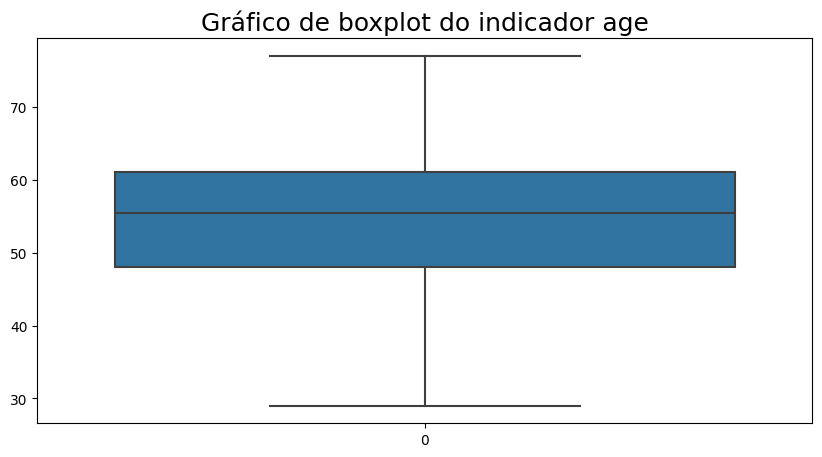

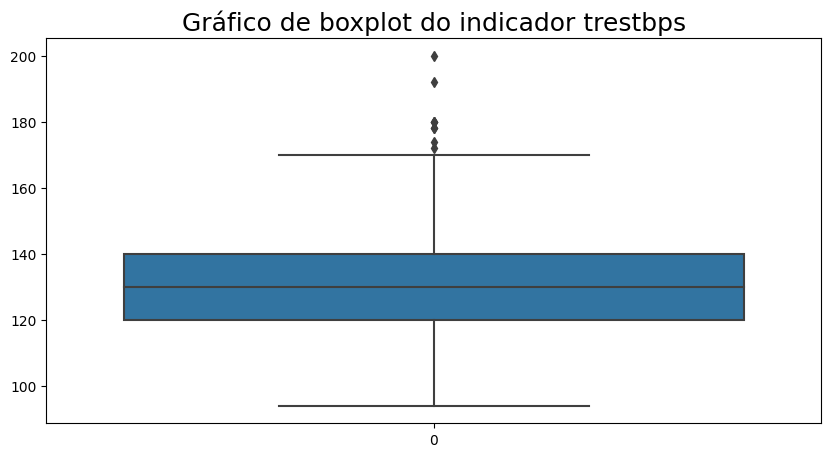

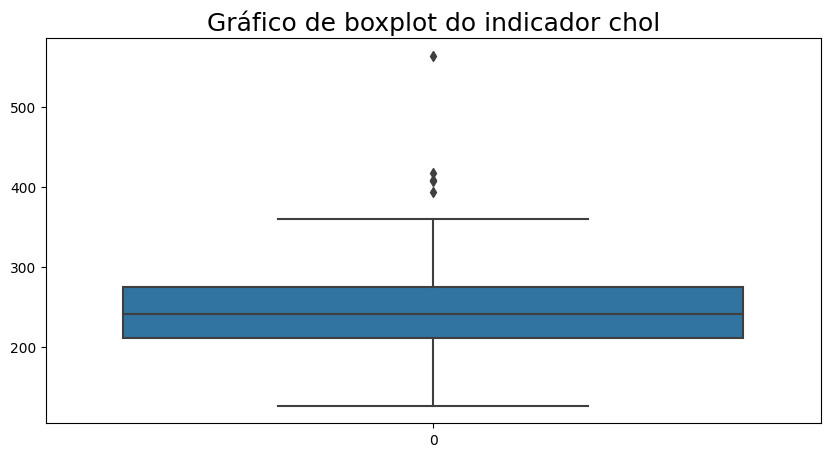

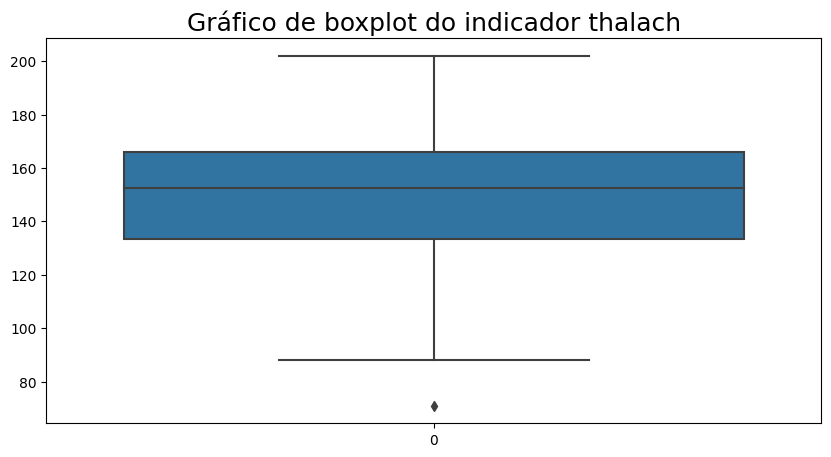

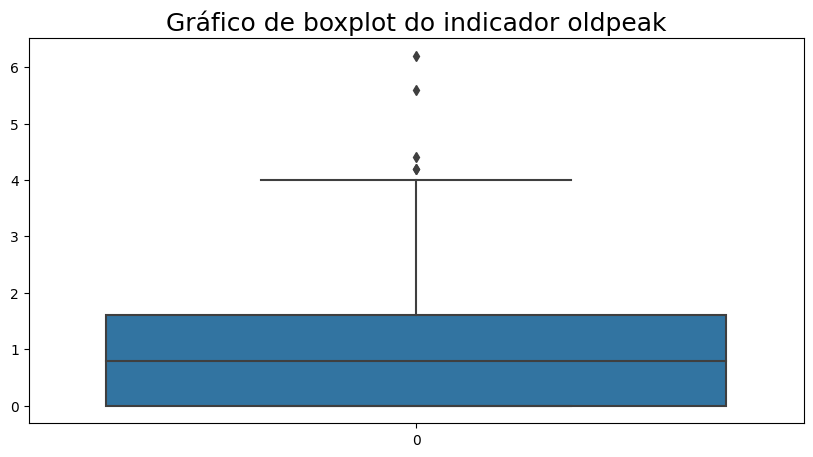

In [ ]:
  for y in var_noncateg:
    plt.figure(figsize = (10,5))
    plt.title(f'Gráfico de boxplot do indicador {y}', fontsize = 18 )
    sb.boxplot(data = core_novo[y])


---
É possível verificar que não só o indicador de colesterol que apresenta outliers, mas também outros indicadores como:


*   TRESTBPS: Pressão Arterial em Repouso (Resting Blood Pressure)
*   THALACH: Frequência Cardíaca Máxima Alcançada (Maximum Heart Rate Frequency)
*   OLDPEAK: Pico Antigo = depressão do segmento ST induzida pelo exercício em relação ao repouso (Oldpeak = ST depression induced by exercise relative to rest)




In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(core_novo))
threshold = 2
outlier_mask = (z_scores > threshold).any(axis=1)
core_atualizado = core_novo[~outlier_mask]
#Preparação para retirar os outliers da base de dados.

In [ ]:
core_novo.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


---
O método z-score identifica a distância dos pontos da média dos dados de cada coluna com relação ao desvio padrão. O threshold é um valor crítico que é utilizado como referência, ou seja, o valor a mais ou a menos que threshold é considerado um outlier. Foi utilizado o 2 como valor crítico comum e o resutado de comparação pode ser visto abaixo.


---



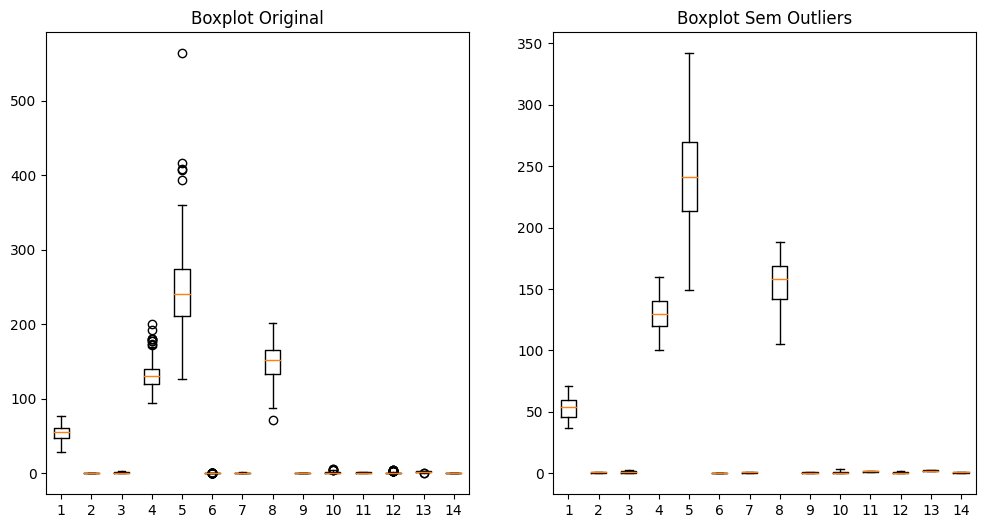

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(core_novo)
plt.title('Boxplot Original')
plt.subplot(1, 2, 2)
plt.boxplot(core_atualizado)
plt.title('Boxplot Sem Outliers')
plt.show()

##Preparação para a implementação do Aprendizado de Máquina


---
Para implementar alguns modelos de machine learning, como Regressão Logística, no banco de dados, é necessário que as variáveis categóricas sejam numéricas para que sejam melhores lidas. A partir disso, será utilizado o get.dummies() para auxiliar nesse objetivo.

---



In [ ]:
core_atualizado = pd.get_dummies(core_atualizado, columns =["sex", "cp", "fbs", "restecg","exang", "slope", "ca","thal" ] )

In [ ]:
core_atualizado

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,restecg_1,exang_0,exang_1,slope_1,slope_2,ca_0,ca_1,ca_2,thal_2,thal_3
0,52,125,212,168,1.0,0,0,1,1,0,...,1,1,0,0,1,0,0,1,0,1
3,61,148,203,161,0.0,0,0,1,1,0,...,1,1,0,0,1,0,1,0,0,1
5,58,100,248,122,1.0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
7,55,160,289,145,0.8,0,0,1,1,0,...,0,0,1,1,0,0,1,0,0,1
8,46,120,249,144,0.8,0,0,1,1,0,...,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,64,140,335,158,0.0,0,0,1,0,0,...,1,1,0,0,1,1,0,0,1,0
723,68,120,211,115,1.5,1,1,0,0,0,...,0,1,0,1,0,1,0,0,1,0
739,52,128,255,161,0.0,0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,1
843,59,160,273,125,0.0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,0


In [ ]:
c1 = core_atualizado.drop('target', axis = 1) #todas as colunas, menos o target
c2 = core_atualizado['target']

In [ ]:
c1_train, c1_test, c2_train, c2_test = train_test_split(c1,c2, test_size = 0.2, random_state = 42) #Divisão dos dados de treinamento e teste de maneira aleatória

##Testes de Modelos de Aprendizado de Máquina

###Regressão Logística (Exemplificação)

In [ ]:
am_log = LogisticRegression(max_iter = 1000) #Foi modificada a quantidade de interações nesse modelo.
am_log.fit(c1_train, c2_train)

LogisticRegression(max_iter=1000)

In [ ]:
am_log.score(c1_train, c2_train) #Acurácia do modelo de Regressão Logística para os dados de treinamento: 88% aproximadamente.

0.8802816901408451

In [ ]:
am_log.score(c1_test, c2_test) #Para os dados de teste, houve uma diminuição de 8% em comparação com os  dados de treinamento.

0.8055555555555556

In [ ]:
am_log_previsao = am_log.predict(c1_test)

In [ ]:
print(classification_report(c2_test, am_log_previsao))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.86      0.83      0.84        23

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.81      0.81      0.81        36




---
O Classification Report irá mostrar os principais indicadores de desempenho do modelo.
*   O **Precision(Previsão)** irá mostrar a proporção dos verdadeiros positivos com todos os positivos possíveis (verdadeiros e falsos positivos), ou seja, quanto maior a precisão, maior a capacidade do modelo de identificar os resultados como realmente verdadeiros positivos.
*   O **Recall(Revocação)** irá mostrar a proporção dos verdadeiros positivos com os verdadeiros positivos e os falsos negativos, ou seja, quanto maior a revocação, maior a capacidade do modelo de evitar a omissão de falsos negativos.
*   O **f1-score** irá mostrar a média harmônica da precisão e da revocação
*   O **support** irá mostrar informações sobre o número de exemplos reais de cada classe.
---



In [ ]:
confusion_matrix(c2_test, am_log_previsao)

array([[10,  3],
       [ 4, 19]])

A matriz de confusão (confusion matrix) é uma ferramenta fundamental para avaliar o desempenho de algoritmos de classificação em aprendizado de máquina. Ela fornece uma representação tabular das previsões feitas por um modelo em comparação com as classes reais dos dados. A matriz de confusão é especialmente útil em problemas de classificação binária e multiclasse. Ela ajuda a quantificar como o modelo está acertando ou errando em suas previsões. A matriz de confusão é composta por quatro valores principais:

1. **Verdadeiros Positivos (True Positives - TP):** São os casos em que o modelo previu corretamente a classe positiva, ou seja, as instâncias que são realmente da classe positiva e foram corretamente identificadas como tal pelo modelo. (Linha 1, Coluna 1)

2. **Falsos Positivos (False Positives - FP):** São os casos em que o modelo previu incorretamente a classe positiva, ou seja, as instâncias que não são da classe positiva, mas foram erroneamente identificadas como tal pelo modelo. (Linha 2, Coluna 1)

3. **Verdadeiros Negativos (True Negatives - TN):** São os casos em que o modelo previu corretamente a classe negativa, ou seja, as instâncias que são realmente da classe negativa e foram corretamente identificadas como tal pelo modelo. (Linha 2, Coluna 2)

4. **Falsos Negativos (False Negatives - FN):** São os casos em que o modelo previu incorretamente a classe negativa, ou seja, as instâncias que são da classe positiva, mas foram erroneamente identificadas como pertencentes à classe negativa pelo modelo. (Linha 1, Coluna 2)
```

###Função Geral

In [ ]:
def funcao_modelos(dados,modelo,indicador = 2 ):
  c1 = core_atualizado.drop('target', axis = 1) #todas as colunas, menos o target
  c2 = core_atualizado['target']
  c1_train, c1_test, c2_train, c2_test = train_test_split(c1,c2, test_size = 0.2, random_state = 42) #Divisão dos dados de treinamento e teste de maneira aleatória
  if indicador == 0:
    am = modelo(max_iter = 1000) #Exemplo de modelo utilizado: Regressão Logística
  elif indicador == 1:
    am = modelo(n_estimators = 1000) #Exemplo de modelo utilizado: RandomForest
  else:
    am = modelo()
  am.fit(c1_train, c2_train)
  am_score_train = am.score(c1_train, c2_train)
  am_score_test = am.score(c1_test, c2_test)
  am_log_previsao = am.predict(c1_test)
  print(f"A acurácia da base de treino foi: {am_score_train * 100:.2f}%")
  print(f"A acurácia da base de teste foi: {am_score_test * 100:.2f}%")
  print("Segue abaixo a tabela de classificação:")
  print(classification_report(c2_test, am_log_previsao))

  print("Segue abaixo a Matriz de Confusão:")
  confusao = confusion_matrix(c2_test, am_log_previsao)
  sb.heatmap(confusao, annot = True, cmap = "Blues")

  return am_score_train, am_score_test




A acurácia da base de treino foi: 88.03%
A acurácia da base de teste foi: 80.56%
Segue abaixo a tabela de classificação:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.86      0.83      0.84        23

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.81      0.81      0.81        36

Segue abaixo a Matriz de Confusão:


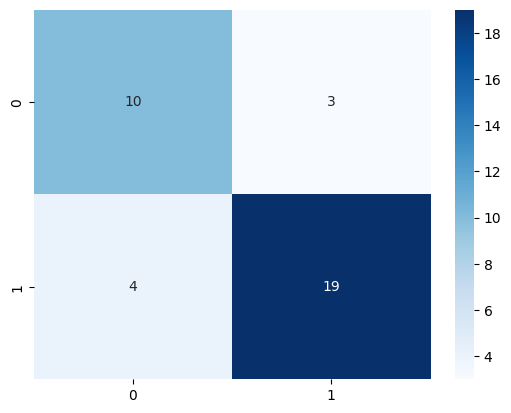

In [ ]:
log_train, log_test = funcao_modelos(core_atualizado, LogisticRegression, indicador = 0) #Modelo de Regressão Logística

A acurácia da base de treino foi: 100.00%
A acurácia da base de teste foi: 86.11%
Segue abaixo a tabela de classificação:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.95      0.83      0.88        23

    accuracy                           0.86        36
   macro avg       0.85      0.87      0.86        36
weighted avg       0.88      0.86      0.86        36

Segue abaixo a Matriz de Confusão:


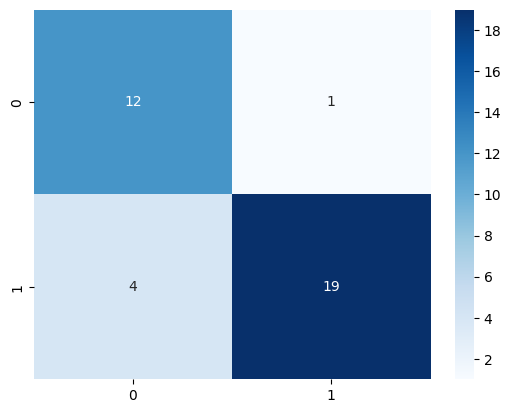

In [ ]:
dt_train, dt_test = funcao_modelos(core_atualizado, DecisionTreeClassifier, indicador = 2) #Modelo de Árvore de Decisão

A acurácia da base de treino foi: 100.00%
A acurácia da base de teste foi: 80.56%
Segue abaixo a tabela de classificação:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.83      0.87      0.85        23

    accuracy                           0.81        36
   macro avg       0.79      0.78      0.79        36
weighted avg       0.80      0.81      0.80        36

Segue abaixo a Matriz de Confusão:


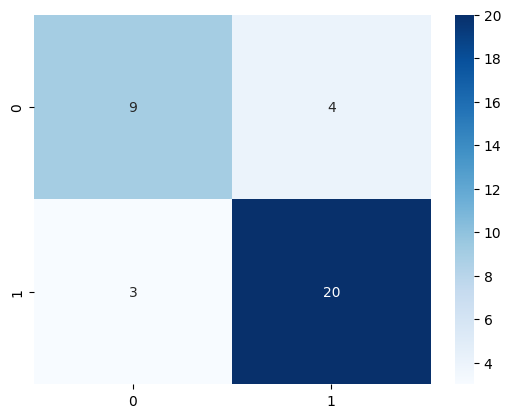

In [ ]:
rf_train, rf_test = funcao_modelos(core_atualizado, RandomForestClassifier, indicador = 1) #Modelo de Random Forest

A acurácia da base de treino foi: 74.65%
A acurácia da base de teste foi: 66.67%
Segue abaixo a tabela de classificação:
              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.72      0.78      0.75        23

    accuracy                           0.67        36
   macro avg       0.63      0.62      0.62        36
weighted avg       0.66      0.67      0.66        36

Segue abaixo a Matriz de Confusão:


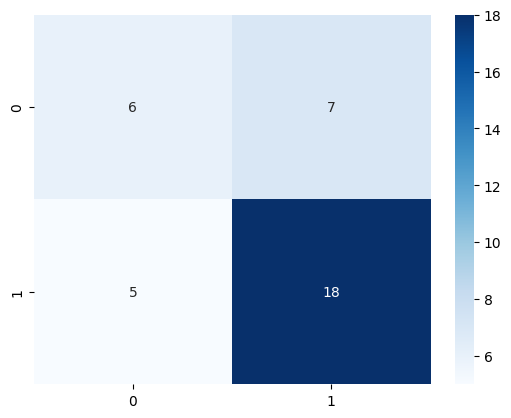

In [ ]:
KN_train, KN_test = funcao_modelos(core_atualizado, KNeighborsClassifier) #Modelo de KNeighbor

A acurácia da base de treino foi: 96.48%
A acurácia da base de teste foi: 80.56%
Segue abaixo a tabela de classificação:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.86      0.83      0.84        23

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.81      0.81      0.81        36

Segue abaixo a Matriz de Confusão:


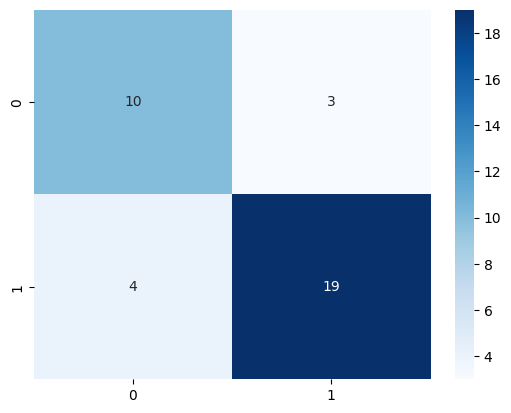

In [ ]:
AD_train, AD_test = funcao_modelos(core_atualizado, AdaBoostClassifier) #Modelo de AdaBoost